# Exploring the data associated to variation fo GIT for dimension one.

## Importing the relevant data and packages

In [1]:
import os
import numpy as np
from numpy.random import random

import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import linear_model 
from __future__ import division

from sympy import *
from sympy import Rational
from sympy.core.numbers import ilcm

from collections import defaultdict
import pickle

We store and pre-process the raw data in another jupyter notebook. We save that output as pickle which we load here.

In [2]:
DataGIT=pickle.load( open( "DataGIT.p", "rb" ) )

In [3]:
DataGIT.shape

(20, 9)

## Visualizing the Geometric Data

For a given degree, we have find the **one parameter subgroups** that classify the semistable objects and the **GIT walls** where our spaces change. 

### One parameter subgroups

We first describe its relationship with respect the degree.

Linear regression parameters: 2.54154724225 [ 0.31757373] 0.998428634942


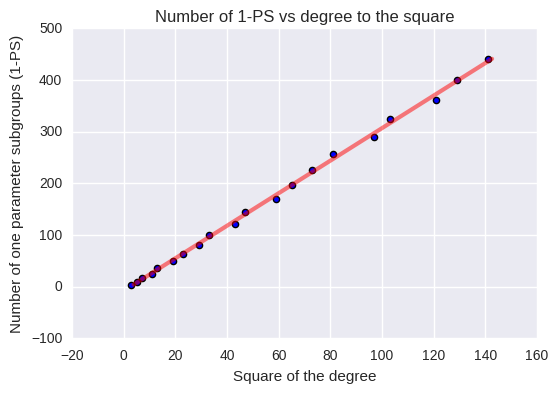

In [4]:
linear=linear_model.LinearRegression()
y=DataGIT["Number1PS"].ix[:].to_frame()
X=(DataGIT.index**2).values.reshape(len(DataGIT.index),1)
linear.fit(X,y )
y_pred = linear.predict(X)

print "Linear regression parameters:", linear.intercept_[0], linear.coef_[0], linear.score(X,y)

plt.plot(y_pred ,X, color='red',linewidth=3, alpha=0.5)
plt.scatter(DataGIT["Number1PS"], DataGIT.index**2 , linewidth=1)
plt.xlabel("Square of the degree"); plt.ylabel("Number of one parameter subgroups (1-PS)")
plt.title("Number of 1-PS vs degree to the square")
plt.show()                                                

Next, we describe the rate of change from one degree to the next one. 

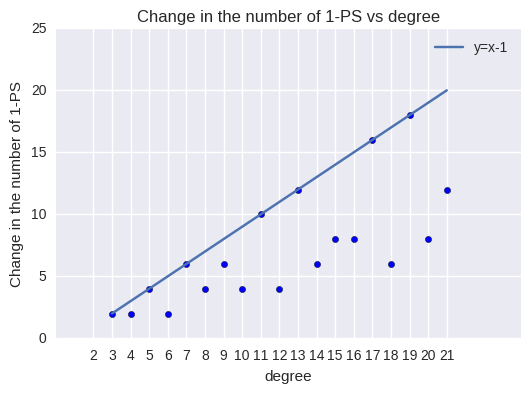

In [5]:
D1PS=[DataGIT["Number1PS"][i+1]-DataGIT["Number1PS"][i]  for i in DataGIT["Number1PS"].index[:-1]]
plt.scatter(DataGIT.index.values[1:], D1PS)

fig=plt.plot(DataGIT.index[1:], DataGIT.index[1:]-1)
plt.ylabel("Change in the number of 1-PS")
plt.xlabel("degree")
plt.title("Change in the number of 1-PS vs degree")
plt.xticks(DataGIT.index)
plt.legend([fig[0]],["y=x-1"])
plt.show()

Next, we compare our data with evenly distributed ones.

Linear regression parameters: -0.02085106143 0.0252478240645 0.953658945655


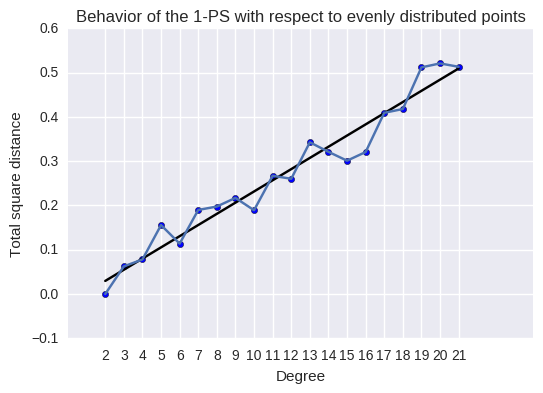

In [6]:
S= [ sum([ ( i[1]- i[0]/(len(DataGIT["Parameter"][s])-1) )**2  
          for i in enumerate(DataGIT["Parameter"][s])])  
          for s in DataGIT.index.values]   

linear=linear_model.LinearRegression()
y_target=Series(S).values.reshape(len(S),1)
X=DataGIT.index.values.reshape(len(S),1)
linear.fit(X,y_target)
y_pred=linear.predict(X)

print "Linear regression parameters:", linear.intercept_[0],linear.coef_[0][0], linear.score(X,y_target)

plt.plot(X,y_pred, color="black")
plt.scatter(x=DataGIT.index, y=S)
plt.plot(DataGIT.index,S[:])

plt.title("Behavior of the 1-PS with respect to evenly distributed points")
plt.ylabel("Total square distance")
plt.xlabel("Degree")
plt.xticks(DataGIT.index)
plt.show()

Next, we ilustrate the behavior of the one parameter subgroups for different degrees. In the following plot the height of the points correspond to the respective degree.

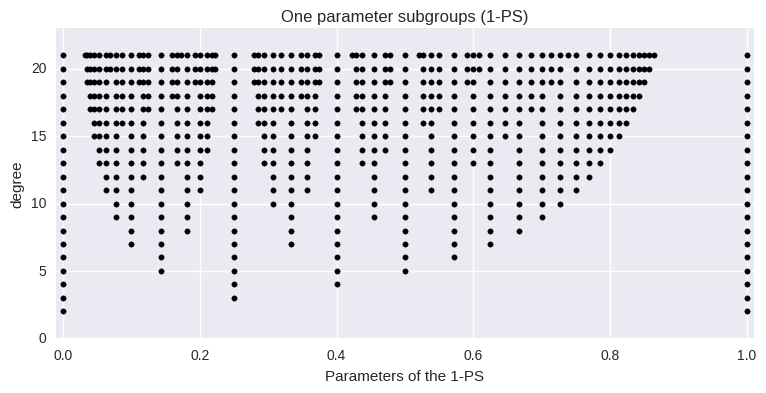

In [7]:
plt.figure(figsize=(9,4))
for i in DataGIT.index:
    val = i
    k=0.1+(0.9-0.1)*i/21
    L=DataGIT["Parameter"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=15, alpha=1)
    plt.xlabel('Parameters of the 1-PS')
    plt.ylabel('degree')
    plt.title("One parameter subgroups (1-PS)")
    plt.axis([-0.01, 1.01, 0, 21+2])
plt.show()    

### GIT walls

Next, we describe the walls that signal a change in our geometric quotients

Linear regression parameters: -4.21222435051 0.0905030825901 -5469320.9195


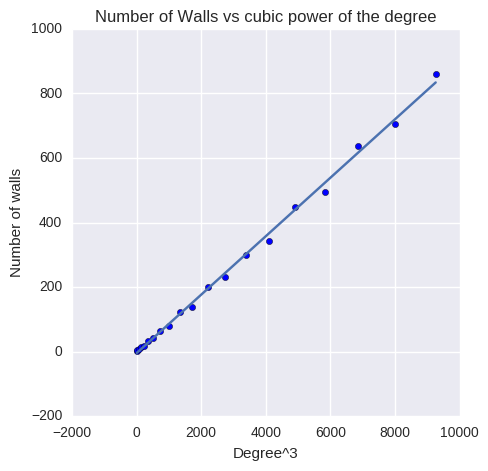

In [8]:
y= (DataGIT.NumberWalls).values.reshape(len(DataGIT.index),1)
X=(DataGIT.index**3).values.reshape(len(DataGIT.index),1)
linear.fit(X,y)
y_pred=linear.predict(X)
print "Linear regression parameters:",linear.intercept_[0],linear.coef_[0][0], linear.score(X,y_target)
plt.figure(figsize=(5,5))

plt.scatter(DataGIT.index.values**3,DataGIT["NumberWalls"])
plt.plot(X,y_pred )

plt.title("Number of Walls vs cubic power of the degree")
plt.xlabel("Degree^3")
plt.ylabel("Number of walls")
plt.show()

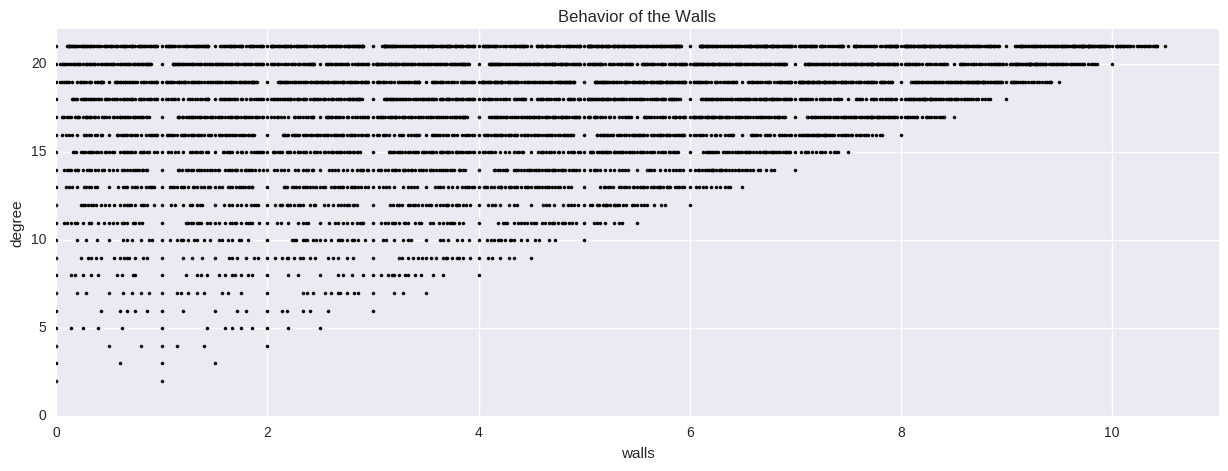

In [9]:
plt.figure(figsize=(15,5))
for i in DataGIT.index:
    val = i
    L=DataGIT["GITWalls"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=5)
    plt.xlabel('walls')
    plt.ylabel('degree')
    plt.title("Behavior of the Walls")
    plt.axis([0, 11.01, 0, 22])
plt.show()    

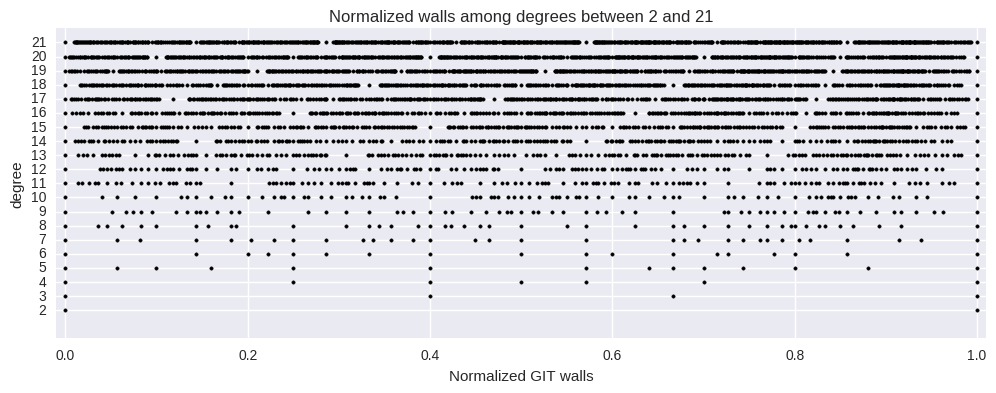

In [10]:
plt.figure(figsize=(12,4))
for i in DataGIT.index:
    val = i
    L=DataGIT["NormalizedGITWalls"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=6)
    plt.xlabel('Normalized GIT walls')
    plt.ylabel('degree')
    plt.yticks(DataGIT.index)
    plt.title("Normalized walls among degrees between {} and {}".format(2,21))
    plt.axis([-0.01, 1.01, 0, 22])
plt.show()   

Next, we examine the distribution of the Walls within every degree.

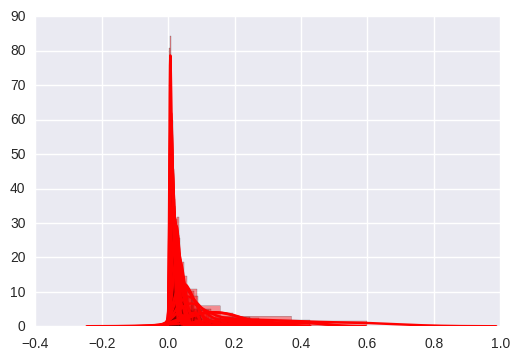

In [11]:
for s in DataGIT.index[2:21]:
    F=[i for i in DataGIT["Diff_GITWalls"].ix[s]];
    sns.distplot(Series(F,dtype=float), color="red")

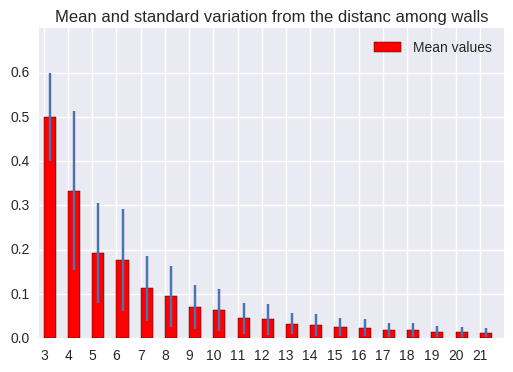

In [12]:
plt.bar(DataGIT.index[1:],
        [Series(DataGIT["Diff_GITWalls"].ix[s]).mean() 
         for s in DataGIT.index[1:] ]
        ,width=0.5, color="r",
        yerr=[Series(DataGIT["Diff_GITWalls"].ix[s]).std() 
              for s in DataGIT.index[1:]]
       )

plt.axis([2.8,22,0,0.7])
plt.xticks((DataGIT.index[1:]))
plt.title("Mean and standard variation from the distanc among walls")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
plt.legend([p], ["Mean values"])

plt.show()

Next, we describe the change among the number of walls whenever we increase the degree

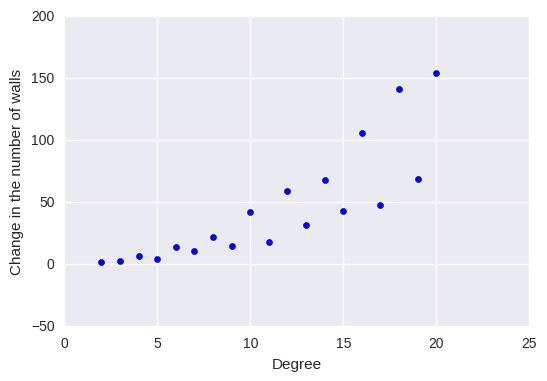

In [13]:
DWalls=[DataGIT["NumberWalls"][i+1]-DataGIT["NumberWalls"][i]  
        for i in DataGIT["NumberWalls"].index[:-1]]
plt.scatter(DataGIT.index[:-1], DWalls)
figsize=(1,1)
plt.ylabel("Change in the number of walls")
plt.xlabel("Degree")

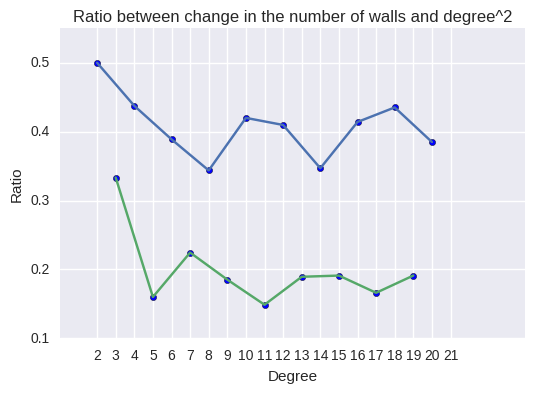

In [14]:
DWalls=[(DataGIT["NumberWalls"][i+1]-DataGIT["NumberWalls"][i])/i**2  
        for i in DataGIT["NumberWalls"].index[:-1]]

plt.scatter(DataGIT.index[:-1], DWalls )
plt.plot([i for i in DataGIT.index[:-1] if i%2==0], 
         [ DWalls[i] for i in range(len(DWalls)) if i%2==0] )
plt.plot([i for i in DataGIT.index[:-1] if i%2==1], 
         [ DWalls[i] for i in range(len(DWalls)) if i%2==1] )

plt.title("Ratio between change in the number of walls and degree^2")
plt.ylabel("Ratio")
plt.xlabel("Degree")
plt.xticks(DataGIT.index)
plt.show()

# Relation between the 1-PS and the number of walls

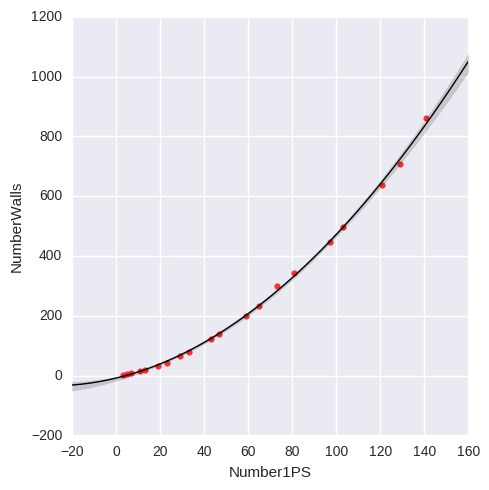

In [15]:
sns.lmplot("Number1PS","NumberWalls",
           DataGIT,order=2, scatter_kws={"color":"red"}, 
           line_kws={"linewidth":1,"color":"black"})
plt.show()

base in the above plot we expect a quadratic relation between the Number of walls and the number of 1-PS

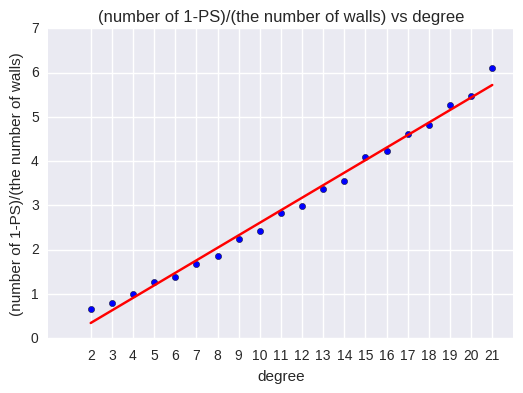

In [16]:
LY=[i[1]/(i[0]) for i in zip( DataGIT["Number1PS"] , DataGIT["NumberWalls"]) ]

y_target=np.array(LY).reshape(len(LY),1)
X=DataGIT.index.values.reshape(len(DataGIT.index),1)
linear.fit(X,y_target)
y_pred=linear.predict(X)
#print linear.coef_, linear.intercept_, linear.score(X,y_target)

plt.scatter(y=y_target,x=X)
plt.plot(X,y_pred, color="red")

plt.xticks(DataGIT.index)
plt.title("(number of 1-PS)/(the number of walls) vs degree")
plt.xlabel("degree")
plt.ylabel("(number of 1-PS)/(the number of walls)")
plt.axis([0,22,0,7])
plt.show()

Finally, I like the following plot

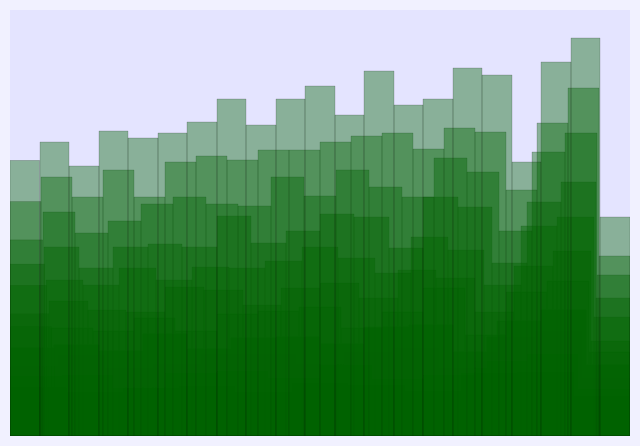

In [20]:
AllWalls=[]
sns.set(rc={'axes.facecolor':(1 0.54902, 0), 'figure.facecolor':(0, 0, 1,1/18)})

for j in DataGIT.index:
    k=0.1+(0.9-0.1)*j/21
    AllWalls=AllWalls+DataGIT["NormalizedGITWalls"].ix[j]
    sns.distplot(AllWalls,bins=1*j,kde=False, color= (0, 0.392157, 0,1-k/8))    
    
plt.xticks(())
plt.yticks(())
plt.show()